<h1>강화학습</h1>

In [1]:
# gym 라이브러리 설치
# 강화학습 연구와 교육을 위해 각종 환경과 API를 제공
!pip install gym==0.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697740 sha256=91fe7f04736bee33a9319c4fe0f6870aacf0c41efacbe1e6a0f2fb19bbc665ea
  Stored in directory: /root/.cache/pip/wheels/c1/d8/e3/7004c3b587864c6b8b5b61290283c40499fe7ba2b9c206ac3a
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [2]:
# 라이브러리
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
# 경고 메시지 출력하지 않기
import warnings
warnings.filterwarnings('ignore')

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


# Fronzen Lake + Q-Learning

환경 설정

In [3]:
# 강의에서 다룬 Fronzen Lake 예제
# 상태: 구멍(H)-출발(S)-얼음(F)-얼음(F)-목적지(G) 의 구조
# 행동: 0(LEFT), 1(DOWN), 2(RIGHT), 3(UP)
#       여기서는 2개만 허용: 0(LEFT), 2(RIGHT)
# 보상: G은 +1, 나머지는 0
env = gym.make('FrozenLake-v1',desc=['HSFFG'],is_slippery=False)

가치함수와 정책함수

In [4]:
# 가치함수: Q테이블, 0으로 초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
# 정책 함수, e는 e-greedy 변수
# 4의 행동에 대한 Q값(L,D,R,U)을 받아 행동을 결정
# 이 중에서 L/R만 사용
def policy(qs,e=0):
  if e > random.random():
    return random.choice([0,2])
  else:
    if qs[0] > qs[2]: return 0
    elif qs[0] < qs[2]: return 2
    else: return random.choice([0,2])

모델 훈련

In [6]:
num_episodes = 100   # 필요하다면 더 늘려서 수행
discount = 0.9
Q = Q*0.0  # Q함수 초기화
for i in range(num_episodes):
  state = env.reset()   # 초기 상태로 리셋
  done = False
  while not done:
    action = policy(Q[state, :],e=0.1) # 행동 결정
    new, reward, done, _ = env.step(action) # 행동에 따른 보상과 새로운 상태
    Q[state,action] = reward + discount*np.max(Q[new, :]) # Q함수 업데이트
    state = new  # 상태 업데이트

In [7]:
Q[1:-1,[0,2]]  # 최종 Q함수

array([[0.   , 0.81 ],
       [0.729, 0.9  ],
       [0.81 , 1.   ]])

# 연습문제

1. 위의 예제에서 다음을 변경하며 수행하시오.<br>
(1) policy 함수에서 e를 0.2으로 변경하였을 때, 최종적인 Q함수는 어떻게 주어지는가? [sH,s0,s1,s2,sD]와 같이 상태를 표시할 때, Q(s2,L)의 값은 얼마인가? 왜 그런지 설명하시오.<br>
(2) discount가 0.7일 때, policy 함수에서 e를 0.1로 두고 충분히 학습시키면 최종적인 Q함수는 어떻게 주어지는가?

In [8]:
# (1)
num_episodes = 100
discount = 0.9
Q = Q*0.00

for i in range(num_episodes):
  state = env.reset()
  done = False
  while not done:
    action = policy(Q[state, :],e=0.2) # Epsilon Greedy의 epsilon을 0으로 설정, 탐험 없이 Greedy하게 선택하게 됨.
    new, reward, done, _ = env.step(action)
    Q[state,action] = reward + discount*np.max(Q[new, :])
    state = new

In [9]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
Q_e_0 = pd.DataFrame(Q, index=['S_H', 'S_0', 'S_1', 'S_2', 'S_D'], columns=['L', 'D', 'R', 'U'])

display(Q_e_0)

,L,D,R,U
S_H,0.00,0.00,0.00,0.00
S_0,0.00,0.00,0.81,0.00
S_1,0.73,0.00,0.90,0.00
S_2,0.81,0.00,1.00,0.00
S_D,0.00,0.00,0.00,0.00


Greedy하게 행동을 결정하기 때문에 s2에서 L 방향은 탐험하지 않음.

In [10]:
# (2)
num_episodes = 100
discount = 0.7                        # Discount Factor(할인율)을 0.7로 설정
Q = Q*0.00

for i in range(num_episodes):
  state = env.reset()
  done = False
  while not done:
    action = policy(Q[state, :],e=0.1)
    new, reward, done, _ = env.step(action)
    Q[state,action] = reward + discount*np.max(Q[new, :])
    state = new

In [11]:
Q_e_07 = pd.DataFrame(Q, index=['S_H', 'S_0', 'S_1', 'S_2', 'S_D'], columns=['L', 'D', 'R', 'U'])

display(Q_e_07)

,L,D,R,U
S_H,0.00,0.00,0.00,0.00
S_0,0.00,0.00,0.49,0.00
S_1,0.34,0.00,0.70,0.00
S_2,0.49,0.00,1.00,0.00
S_D,0.00,0.00,0.00,0.00


2. 위의 예제에서 아래와 같이 환경을 생성하고 Q학습을 수행하시오. 이 경우는 2차원 공간이기 때문에 4개의 행동이 모두 허용되어야 한다. policy 함수 및 다른 코드를 적절히 변경해가며 수행하시오. 최종적인 Q함수가 적절한지 확인하시오.

In [12]:
env = gym.make('FrozenLake-v1',desc=["SFFF","FHFH","FFFH","HFFG"],is_slippery=False)

In [13]:
Q = np.zeros([env.observation_space.n, env.action_space.n]) # 환경이 달라졌으며, State 또한 달라졌기에 Q를 다시 정의해주어야 한다.
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [14]:
def policy(qs,e=0):
  if e > random.random():
    return random.choice([0,1,2,3]) # 1차원 공간이 아닌 2차원 공간이기에 L,D,R,U의 행동을 모두 포함시켜줘야 한다.
  else:
    max_actions = np.where(qs == qs.max())[0]
    return random.choice(max_actions)

In [15]:
num_episodes = 10000
discount = 0.9
Q = Q*0.00

for i in range(num_episodes):
  state = env.reset()
  done = False
  while not done:
    action = policy(Q[state, :],e=0.1) # 행동 결정
    new, reward, done, _ = env.step(action) # 행동에 따른 보상과 새로운 상태
    Q[state,action] = reward + discount*np.max(Q[new, :]) # Q함수 업데이트
    state = new  # 상태 업데이트

In [16]:
Q_ = pd.DataFrame(Q, index=['S_0_0', 'F_0_1', 'F_0_2', 'F_0_3', 'F_1_0', 'H_1_1', 'F_1_2', 'H_1_3', 'F_2_0', 'F_2_1', 'F_2_2', 'H_2_3', 'H_3_0', 'F_3_1', 'F_3_2', 'G_3_3'], columns=['L', 'D', 'R', 'U'])
display(Q_)
# print(Q)

,L,D,R,U
S_0_0,0.53,0.59,0.59,0.53
F_0_1,0.53,0.00,0.66,0.59
F_0_2,0.59,0.73,0.59,0.66
F_0_3,0.66,0.00,0.59,0.59
F_1_0,0.59,0.66,0.00,0.53
H_1_1,0.00,0.00,0.00,0.00
F_1_2,0.00,0.81,0.00,0.66
H_1_3,0.00,0.00,0.00,0.00
F_2_0,0.66,0.00,0.73,0.59
F_2_1,0.66,0.81,0.81,0.00


### 예시

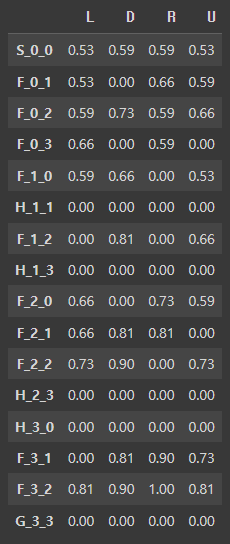 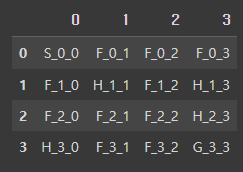

S_0_0 출발하여, 가장 높은 가치인 D가 결정 됨. 따라서 F_1_0으로 향함. 해당 위치에서도 D의 값이 가장 높아서, F_2_0으로 향함. F_2_0 위치에서는 R의 값이 가장 높아, F_2_1으로 향함. F_2_1에서는 D가 결정되어, F_3_1을 향함. F_3_1에서는 R, F_3_2에서 R으로 결정되어 목적지에 도착하였다. 표에는 소수점 표기에 의해 같은 점수로 판단된 곳에서(ex. S_0_0의 D, R) 어떤 행동을 하던지 결과는 목적지 도착한다.